# Analysing Climate Change

The data I am woking with are [monthly](http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt) and [yearly](http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_summary.txt) average global temperatures from Berkeley Earth.

Temperatures are in Celsius and reported as anomalies relative to the Jan 1951-Dec 1980 average. Uncertainties represent the 95% confidence interval for statistical and spatial undersampling effects as well as ocean biases.

Estimated Jan 1951-Dec 1980 global mean temperature (C) is 14.169 +/- 0.049

Estimated Jan 1951-Dec 1980 monthly absolute temperature:


| |Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec|
|---|---|---|---|---|---|---|---|---|---|---|---|---|
| |12.29|12.49|13.11|14.04|15.01|15.72|16.00|15.82|15.23|14.29|13.28|12.55|
|**+/-**|0.06|0.06|0.06|0.06|0.05|0.05|0.05|0.05|0.05|0.05|0.05|0.06|

In [1]:
project_name = "zerotopandas-course-project-climate"

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name, files=["./Land_and_Ocean_summary.txt", "./Land_and_Ocean_complete.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "nayanakamtekar/zerotopandas-course-project-climate" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate


'https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate'

## Data Preparation and Cleaning

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.patches as mpatches
%matplotlib inline

###### Let's first import yearly temperature data

The data file is space seperated. `delim_whitespace` function argument allows to read space seperated files with `read_csv` function.

There are 48 lines at the top of the file with data description that are skipped with `skiprows`.

Only first three columns are used. The columns are specified by `usecols`, which is a list of column indices, and the column labels are specified by `names`

In [6]:
temp_yr_df = pd.read_csv(r'./Land_and_Ocean_summary.txt'
                         , usecols=[0, 1, 2]
                         , skiprows=48
                         , delim_whitespace=True
                         , names=['year', 'yr_anomaly', 'yr_unc'])

Let's have a look at first 10 rows

In [7]:
temp_yr_df.head(10)

,year,yr_anomaly,yr_unc
0,1850,-0.517,0.235
1,1851,-0.391,0.280
2,1852,-0.385,0.269
3,1853,-0.414,0.251
4,1854,-0.359,0.184
5,1855,-0.338,0.177
6,1856,-0.460,0.142
7,1857,-0.599,0.169
8,1858,-0.444,0.141
9,1859,-0.375,0.148


For analysis, it is important that the data is imported as numbers, and not as string. Let's have a look at data types of columns.

In [8]:
temp_yr_df.dtypes

year            int64
yr_anomaly    float64
yr_unc        float64
dtype: object

In [9]:
temp_yr_df.shape

(170, 3)

###### Now let's import monthy temperature data

This data file is also space seperated, therefore `delim_whitespace` function argument is used with `read_csv` function.

There are 77 lines at the top of the file with data description that are skipped with `skiprows`.

There are also 2055 lines at the bottom of the files that are not used. These lines are skipped using `skipfooter`. The `skipfooter` argument is not available with default `C` engine, hence `python` engine is used. `python` engine is bit slower than `C`engine, but with not so big data as ours, it does not make any difference.

Only first 4 columns are used. The columns are specified by `usecols`, which is a list of column indices, and the column labels are specified by `names`

In [10]:
temp_month_df = pd.read_csv(r'./Land_and_Ocean_complete.txt'
                            , skiprows=77
                            , delim_whitespace=True
                            , engine='python'
                            , skipfooter=2055
                            , usecols = [0, 1, 2, 3]
                            , names=['year', 'month', 'month_anomaly', 'month_unc'])

Let's have a look at first 10 rows to check if the data file is properly imported. Also, lets have a look at the shape of the dataframe, and also make syre that all the columns are imported as numbers.

In [11]:
temp_month_df.head(10)

,year,month,month_anomaly,month_unc
0,1850,1,-0.777,0.412
1,1850,2,-0.239,0.458
2,1850,3,-0.426,0.447
3,1850,4,-0.680,0.367
4,1850,5,-0.687,0.298
5,1850,6,-0.388,0.396
6,1850,7,-0.218,0.317
7,1850,8,-0.222,0.331
8,1850,9,-0.483,0.280
9,1850,10,-0.656,0.349


In [12]:
temp_month_df.dtypes

year               int64
month              int64
month_anomaly    float64
month_unc        float64
dtype: object

In [13]:
temp_month_df.shape

(2048, 4)

In [14]:
import jovian

In [15]:
jovian.commit(project=project_name, files=["./Land_and_Ocean_summary.txt", "./Land_and_Ocean_complete.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nayanakamtekar/zerotopandas-course-project-climate" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate


'https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate'

## Exploratory Analysis

Let's see bsic statistics for yearly data

In [16]:
temp_yr_df.describe()

,year,yr_anomaly,yr_unc
count,170.000000,170.000000,170.000000
mean,1934.500000,-0.060718,0.081771
std,49.218899,0.354611,0.046767
min,1850.000000,-0.649000,0.032000
25%,1892.250000,-0.341000,0.047000
50%,1934.500000,-0.129000,0.071500
75%,1976.750000,0.091500,0.096750
max,2019.000000,0.955000,0.280000


From the basic statistics it is apparent that
- The data is from year 1850 (minimum) to 2019 (maximum)
- There are no NaN values as the count 170 is in agreement with the shape of the datframe

---

Lets check if the years are represented only once - i.e. there are no duplicates.\
`duplicated` returns boolean Series denoting duplicate rows, optionally only considering certain columns.\
`any` returns a boolean True if any value in a series is True

In [17]:
 temp_yr_df.duplicated(subset=['year']).any()

False

In [18]:
import jovian

In [19]:
jovian.commit(project=project_name, files=["./Land_and_Ocean_summary.txt", "./Land_and_Ocean_complete.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nayanakamtekar/zerotopandas-course-project-climate" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate


'https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate'

## Asking and Answering Questions

### Is the planet heating up?
The general agreement is that the planet is heating up leading to global warming. This can be investigated with simple visualization to check for trend in global yearly average temperature.

Lets plot the global average temperature against years along with the uncertainty.

The plot clearly shows that there is a steady upward trend in yearly temperature with accelerated upward trend since end of 20<sup>th</sup> century.

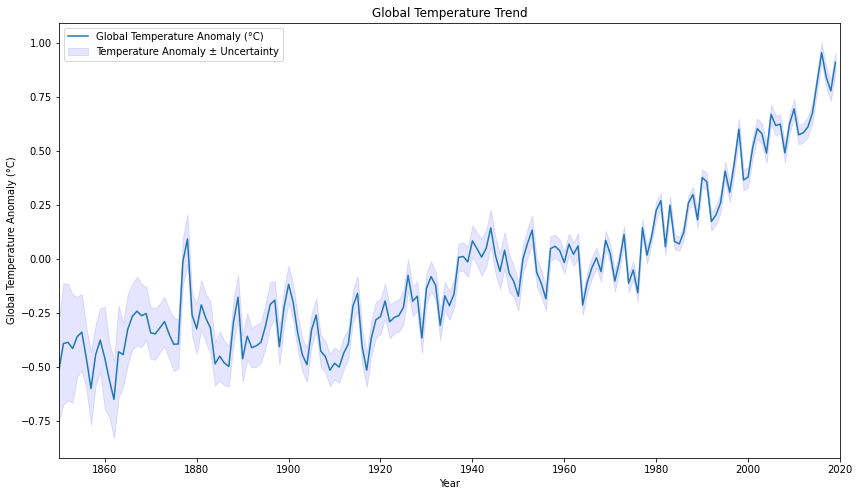

In [20]:
plt.figure(figsize=(14, 8))
plt.xlabel('Year')
plt.ylabel('Global Temperature Anomaly (°C)')
plt.xlim(1850, 2020)
plt.plot(temp_yr_df.year, temp_yr_df.yr_anomaly, label='Global Temperature Anomaly (°C)')
plt.fill_between(temp_yr_df.year, temp_yr_df.yr_anomaly - temp_yr_df.yr_unc, temp_yr_df.yr_anomaly + temp_yr_df.yr_unc,
                 color='b', alpha=.1, label='Temperature Anomaly ± Uncertainty')
plt.legend(loc='upper left')
plt.title('Global Temperature Trend');

### Can the temperature trend be visualized differently?

The upward trend in temperature can also be seen in what is called a climate strip. This is essentially a heatmap of temperatures over years. This essentially conveys similar information as the line plot above, but with more visual impact!

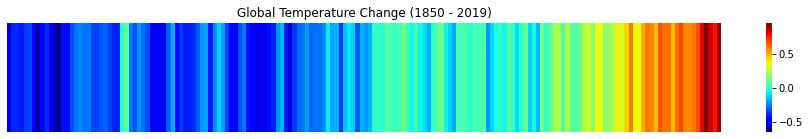

In [21]:
temperature_trans_df = temp_yr_df.loc[:, ['year', 'yr_anomaly']].T.rename(columns=temp_yr_df.year).drop('year')
plt.figure(figsize=(16, 2))
plt.title('Global Temperature Change (1850 - 2019)')
sns.heatmap(temperature_trans_df, yticklabels=False, xticklabels=False, cmap=cm.jet);

In [22]:
import jovian

In [23]:
jovian.commit(project=project_name, files=["./Land_and_Ocean_summary.txt", "./Land_and_Ocean_complete.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nayanakamtekar/zerotopandas-course-project-climate" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate


'https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate'

### Which are the hottest years?

###### Lets see which are the top 10 hottest years.

The average yearly temperatures are ranked with `rank` method with highest temperature ranked first (`ascending=False`). The tied ranks are resolved by assigning the highest rank in the group (`method='max'`)\
Then it is just a matter of sorting by rank and displaying first 10 records

In [24]:
temp_yr_df['yr_anomaly_rank'] =  temp_yr_df['yr_anomaly'].rank(ascending=False, method='max')
temp_yr_df.loc[:,['year', 'yr_anomaly', 'yr_anomaly_rank']].sort_values('yr_anomaly_rank').head(10)

,year,yr_anomaly,yr_anomaly_rank
166,2016,0.955,1.0
169,2019,0.910,2.0
167,2017,0.842,3.0
165,2015,0.817,4.0
168,2018,0.778,5.0
160,2010,0.695,6.0
164,2014,0.676,7.0
155,2005,0.669,8.0
157,2007,0.624,9.0
159,2009,0.623,10.0


Wow! looks like all top 10 hottest years are from 21<sup>st</sup> century.

###### Lets try to visualise the hottest years

For the visualization, lets color years differently that belong to different decades/half-centuries. The years is "binned" in to different decades/half-centuries using pandas `cut` method

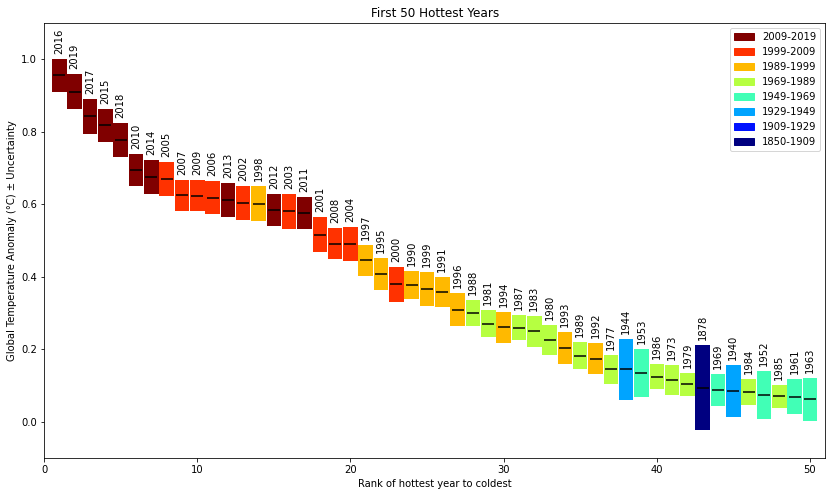

In [25]:
bins = [1850, 1909, 1929, 1949, 1969, 1989, 1999, 2009, 2019]
labels = [f'{x[0]}-{x[1]}' for x in zip(bins, bins[1:])]
temp_yr_df['bin'] = pd.cut(temp_yr_df['year'], bins=bins,
                           include_lowest=True, labels=labels)

plt.figure(figsize=(14, 8))

# Colormap is divided in to 8 colors
cmap = cm.get_cmap('jet', len(bins) - 1)


# The first 50 ranked years are plotted with rank on the x-axis and temperature +/- uncertainty on y-axis. 
# Each year is colored according to in decade/half-rear it falls in to. The year label for each bar are saved 
# in to `rectlabels` list, that will be used to label bars. 
rectlabels = []
rects = []
for rank in range(1, 51):
    rects.append(plt.bar(rank, 2 * temp_yr_df[temp_yr_df['yr_anomaly_rank'] == rank].yr_unc,
                         bottom=temp_yr_df[temp_yr_df['yr_anomaly_rank'] == rank].yr_anomaly - temp_yr_df[
                             temp_yr_df['yr_anomaly_rank'] == rank].yr_unc,
                         width=0.95,
                         color=cmap(labels.index(temp_yr_df[temp_yr_df['yr_anomaly_rank'] == rank].bin.array))))
    rectlabels.append(*list(temp_yr_df[temp_yr_df['yr_anomaly_rank'] == rank].year.array))


# The bar labels are plotted as text plot. each bar is investigated to get the appropriate x, y coordinate for the text plot
for i, lrect in enumerate(rects):
    rect = lrect.get_children()[0]
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() + 0.02, rectlabels[i],
             rotation='vertical',
             ha='center')

    

# Temperatures are plotted as scatter plot with line marker 
plt.scatter(temp_yr_df[temp_yr_df['yr_anomaly_rank'] <= 50].yr_anomaly_rank,
            temp_yr_df[temp_yr_df['yr_anomaly_rank'] <= 50].yr_anomaly, s=125, color='black', marker='_', zorder=999)


# Custom legend is made for each color representing decade/half-century
patches = []
for i, label in enumerate(labels):
    patches.append(mpatches.Patch(color=cmap(i), label=label))

plt.legend(handles=patches[::-1])

plt.xlabel('Rank of hottest year to coldest')
plt.ylabel('Global Temperature Anomaly (°C) ± Uncertainty')
plt.xlim(0, 51)
plt.ylim(-0.1, 1.1)
plt.title("First 50 Hottest Years");

It is clearly seen that the most hottest years belong to this decade (2010-2019), and majority of first 20 hottest year belong to 21<sup>st</sup> century. A clear trend can be seen from this visualization.

In [26]:
import jovian

In [27]:
jovian.commit(project=project_name, files=["./Land_and_Ocean_summary.txt", "./Land_and_Ocean_complete.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nayanakamtekar/zerotopandas-course-project-climate" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate


'https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate'

### Does monthly temperature data also shows similar trend?

Lets look at the data with polar plot where each year is presented as a contour/loop. Each contour/loop is color differently to pick out a trend. The radials near center are colder temperatures.

We can observe in the plot that the years are plotted as concentric circles, with earlier years near the center and later yeas towards in circumference of the circle. This demonstrate that the temperatures are rising over the years

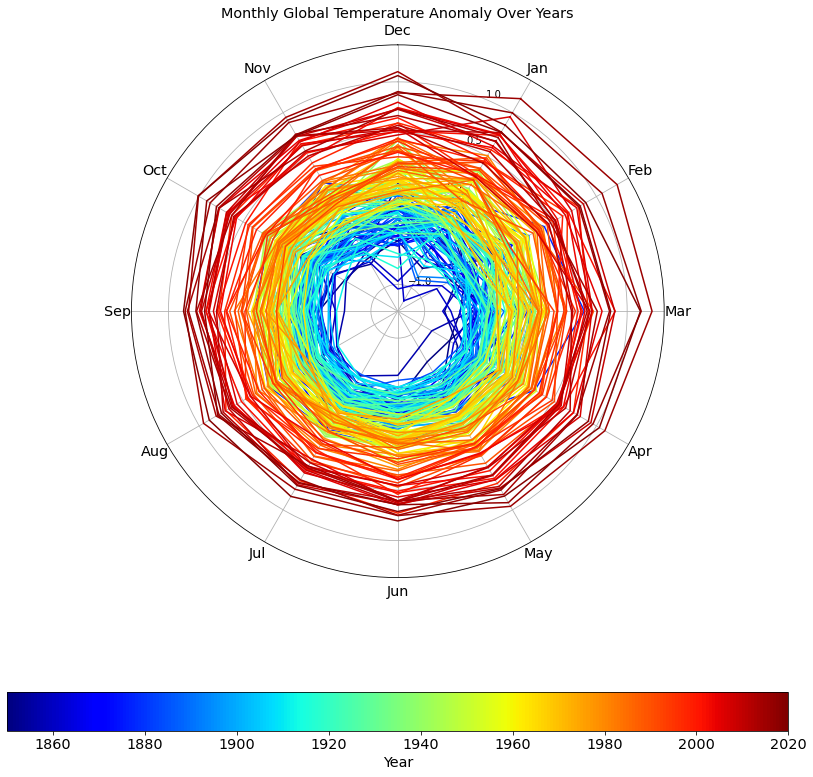

In [28]:
# An extra dummy month is added which is a copy of January month in the same year so that December and January in the same year
# are joined and the contour/loop is closed
temp_month_13_df = temp_month_df.loc[temp_month_df.month == 1, :].copy()
temp_month_13_df['month'] = 13
temp_month_polar_df = pd.concat([temp_month_df, temp_month_13_df])

# Lets convert months in to radians
temp_month_polar_df['month_rads'] = 2 * np.pi / 12 * temp_month_df.month
temp_month_polar_df.sort_values(['year', 'month'])

# Plot it as  polar plot
plt.figure(figsize=(14, 14))
ax = plt.axes(projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Colormap is normalize using minimum and maximum years of available monthly data
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=plt.Normalize(vmin=1850, vmax=2020))
cbar = plt.colorbar(sm, orientation="horizontal")
cbar.set_label(label='Year', size='x-large')
cbar.ax.tick_params(labelsize='x-large')
plt.xticks([np.deg2rad(i) for i in range(0, 360, 30)],
           labels=['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'], size='x-large')
for year in range(1850, 2020):
    plt.plot(temp_month_polar_df[temp_month_polar_df.year == year].month_rads,
             temp_month_polar_df[temp_month_polar_df.year == year].month_anomaly, color=sm.to_rgba(year))
plt.title("Monthly Global Temperature Anomaly Over Years", size='x-large');

### In which year each of the month has the hottest recorded temperature?

We can answer this question by ranking temperatures by month.

The result shows that all the months had the highest recorded temperatures within last 6 years (2015 - 2020)

In [29]:
temp_month_df['month_anomaly_rank'] =  temp_month_df.loc[:, ['month', 'month_anomaly']].groupby('month').rank(ascending=False, method='first')
temp_month_df.loc[:,['year', 'month', 'month_anomaly', 'month_anomaly_rank']].sort_values(['month_anomaly_rank', 'month']).head(12)

,year,month,month_anomaly,month_anomaly_rank
1992,2016,1,1.159,1.0
1993,2016,2,1.236,1.0
1994,2016,3,1.246,1.0
2043,2020,4,1.139,1.0
2044,2020,5,0.971,1.0
2045,2020,6,0.845,1.0
2046,2020,7,0.858,1.0
1999,2016,8,0.950,1.0
2036,2019,9,0.851,1.0
2037,2019,10,1.013,1.0


###### Lets try to visualise when the 10 most hottest months occur

Lets create a heatmap where rank is plot along the y-axis and month is plot along x-axis. The years are then annotated in the cells. The cells are collored by decades. 

A `heatmap` function from `seaborn` does not allow to color the cell by any other value than the value printed in the cell. We would like to color the cell by the decade in which it falls to see if the latest decades are getting any hotter. Such a heatmap needs to be plotted with lower-level function with some extensive formatting.

We will use `imshow` function from `matplotlib.pyplot`. We will create a image data, where first 2-dimension define the rows and columns of the image. The third dimension defines RGBA values. The year are then plotted with text plot in the cells. The legend is custom defined with `matplotlib.patches` 

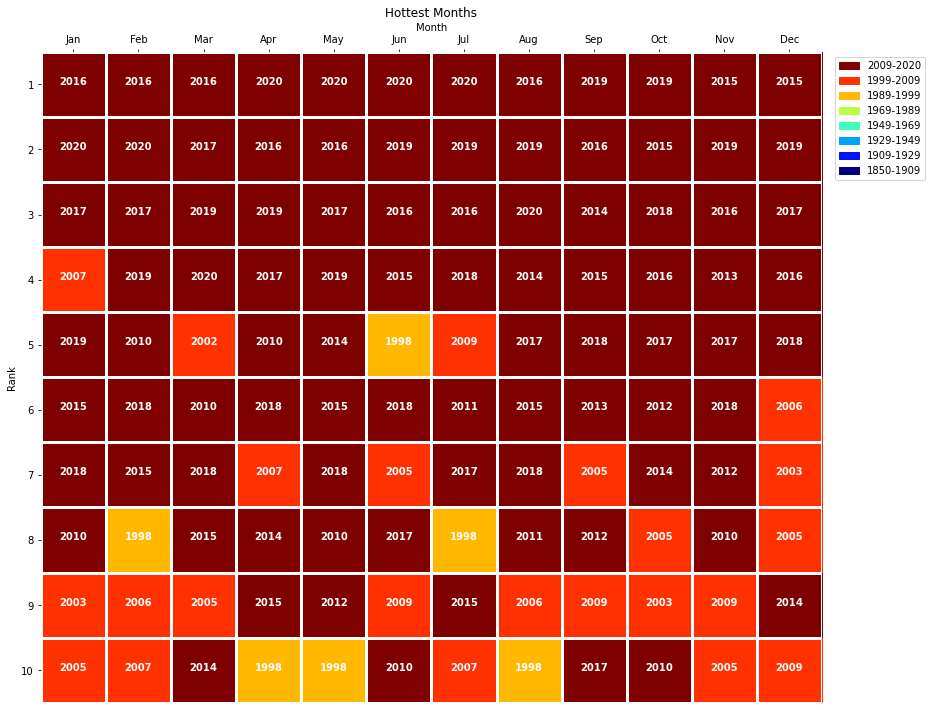

In [30]:
bins = [1850, 1909, 1929, 1949, 1969, 1989, 1999, 2009, 2020]
labels = [f'{x[0]}-{x[1]}' for x in zip(bins, bins[1:])]
temp_month_df['bin'] = pd.cut(temp_month_df['year'], bins=bins,
                              include_lowest=True, labels=labels)

plt.figure(figsize=(14, 14))

# Colormap is divided in to 8 colors
cmap = cm.get_cmap('jet', len(bins) - 1)

rank_list = []
for rank in range(1, 11):
    month_list = []
    for month in range(1, 13):
        year = temp_month_df[(temp_month_df['month_anomaly_rank'] == rank) & (temp_month_df['month'] == month)].year.iloc[0]
        bin = temp_month_df[(temp_month_df['month_anomaly_rank'] == rank) & (temp_month_df['month'] == month)].bin.iloc[0]
        cmap_color = cmap(labels.index(bin))
        month_list.append(cmap_color)
    rank_list.append(month_list)

ax = plt.gca()
im = ax.imshow(np.array(rank_list))

ax.set_xticks(range(12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel('Month')
ax.xaxis.set_label_position('top')

ax.set_yticks(range(10))
ax.set_yticklabels(range(1, 11))
ax.set_ylabel('Rank')

ax.set_xticks(np.arange(13) - .5, minor=True)
ax.set_yticks(np.arange(11) - .5, minor=True)
ax.xaxis.set_ticks_position('top')
ax.tick_params(which="minor", top=False, left=False)

# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.grid(True, which='minor', color="w", linestyle='-', linewidth=3)

for rank in range(1, 11):
    for month in range(1, 13):
        im.axes.text(month - 1, rank - 1, temp_month_df[
            (temp_month_df['month_anomaly_rank'] == rank) & (temp_month_df['month'] == month)].year.iloc[0], c='w',
                     ha='center', weight='bold')


patches = []
for i, label in enumerate(labels):
    patches.append(mpatches.Patch(color=cmap(i), label=label))

plt.legend(handles=patches[::-1], bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title('Hottest Months');

Its striking that the top hottest month occured in the current decade.

In [31]:
import jovian

In [32]:
jovian.commit(project=project_name, files=["./Land_and_Ocean_summary.txt", "./Land_and_Ocean_complete.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nayanakamtekar/zerotopandas-course-project-climate" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate


'https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate'

## Inferences and Conclusion

### What did we learn?

We set out to investigate trend in global temperatures. We looked at yearly as well as monthly average temperature data. We can fairly confidently say that
- Global temperatures show clear upward trend
- Most of the hottest year are in recent decade
- Most of the record high for months are in recent decades

In [33]:
import jovian

In [34]:
jovian.commit(project=project_name, files=["./Land_and_Ocean_summary.txt", "./Land_and_Ocean_complete.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nayanakamtekar/zerotopandas-course-project-climate" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate


'https://jovian.ml/nayanakamtekar/zerotopandas-course-project-climate'

## References and Future Work

The [monthly](http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt) and [yearly](http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_summary.txt) data is used from Berkeley Earth

For further analysis of climate change, the temperature data can be analysed against, for example, artic ice cover volume, CO2 emmisions etc. to see how these factors work in tandem


In [35]:
import jovian

In [ ]:
jovian.commit(project=project_name, files=["./Land_and_Ocean_summary.txt", "./Land_and_Ocean_complete.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
